In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.linalg import cond
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from load_data import loadData
from QSAR_Lab.spliter import split_x_to_n

In [2]:
def linear(x,a,b):
    return a*x +b

In [3]:
# Parameters reader

line = 278 # Git 

file = open('./hyper_param.txt')
content = file.readlines()
file.close()
param = content[line].split()

rand = int(param[2].replace(",",""))
rand_cv = int(param[5])

In [4]:
# # Load Data
# X_train, X_test, y_train, y_test = loadData()

# Load Data
X = pd.read_excel("../Data/My_Selected_X.xlsx", sheet_name=0, index_col=0)
y = pd.read_excel("../Data/data_dummies.xlsx", index_col=0, sheet_name=2)
X_train, X_test, y_train, y_test = split_x_to_n(X, y, sort=True)
len(X_train.index)

200

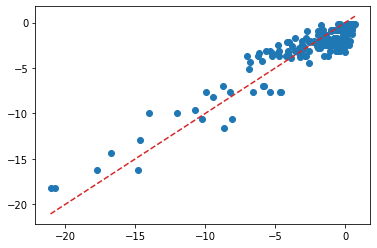

In [5]:
# Create Model
model = AdaBoostRegressor(random_state=rand, n_estimators=100)
model.fit(np.array(X_train), y_train)
y_train_pred = model.predict(np.array(X_train))
y_test_pred = model.predict(np.array(X_test))

plt.scatter(y_train,y_train_pred)
plt.plot(y_train, y_train, c="tab:red", ls="--")
plt.show()

In [6]:
# Cross-Validation
kfold = ShuffleSplit(n_splits=5, test_size=0.25, random_state=rand_cv)
scores = cross_val_score(model, X_train, y_train, cv=kfold)

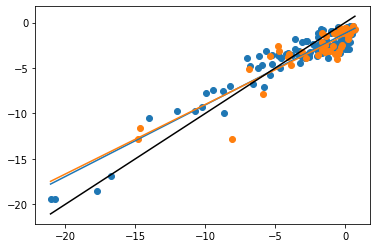

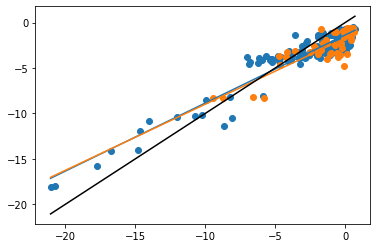

3.6433333333333326
4.65375


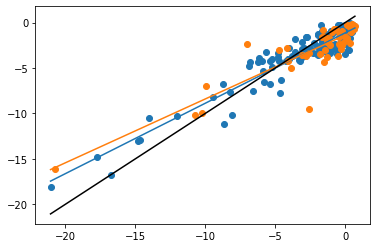

6.960000000000001


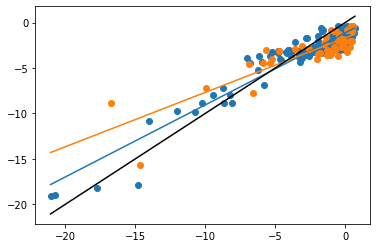

7.914999999999999


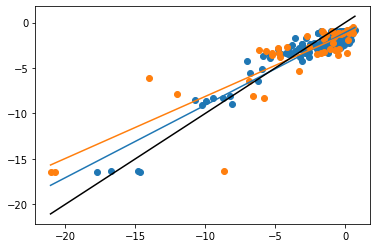

7.852500000000001
7.6899999999999995
CV = 0.6495715723740452


In [7]:
X = np.array(X_train)
for train, test in kfold.split(X):
    X_tr, X_tst, y_tr, y_tst = (X[train], X[test], y_train[train], y_train[test])


    
    model_cv = AdaBoostRegressor(random_state=rand, n_estimators=100)
    model_cv.fit(X_tr, y_tr)

    y_tr_pred = model_cv.predict(X_tr)
    y_tst_pred = model_cv.predict(X_tst)
    
    popt_tr, pcov = curve_fit(linear, y_tr, y_tr_pred)
    popt_tst, pcov = curve_fit(linear, y_tst, y_tst_pred)

    plt.scatter(y_tr,y_tr_pred)
    plt.plot(y_train, linear(y_train, popt_tr[0],popt_tr[1]))
    
    plt.scatter(y_tst,y_tst_pred)
    plt.plot(y_train, linear(y_train, popt_tst[0],popt_tst[1]))
    
    plt.plot(y_train, y_train, c="black")
    
    plt.show()
    

    
    for i, j in zip(y_tst,y_tst_pred):
        if abs(i-j) > np.std(y_tst)*1.5:
            print(abs(i-j))
print(f"CV = {scores.mean()}")

# MODEL

In [8]:
popt_train, pcovtrn = curve_fit(linear, y_train, y_train_pred)
popt_test, pcovtst = curve_fit(linear, y_test, y_test_pred)

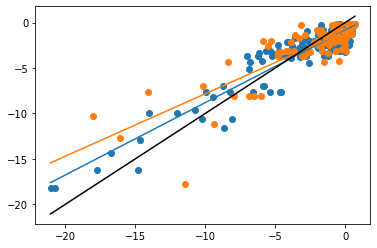

In [9]:
plt.scatter(y_train,y_train_pred)
plt.plot(y_train, linear(y_train, popt_train[0],popt_train[1]))

plt.scatter(y_test, y_test_pred)
plt.plot(y_train, linear(y_train, popt_test[0],popt_test[1]))

plt.plot(y_train, y_train, c="black")
plt.show()

In [10]:
print(f"TRAIN: = {model.score(np.array(X_train), y_train)}")
print(f" TEST: = {model.score(np.array(X_test), y_test)}")

TRAIN: = 0.8625106610362154
 TEST: = 0.7021404229594267


In [11]:
print("----- Train -----")
for i, j in zip(y_train,y_train_pred):
    if abs(i-j) > 4:
        print(abs(i-j))
print("\n----- Test -----")
for i, j in zip(y_test,y_test_pred):
    if abs(i-j) > np.std(y_test)*1.5:
        print(abs(i-j))

----- Train -----
4.01630434782609

----- Test -----
7.737529411764708
6.3815789473684195
6.314418604651166


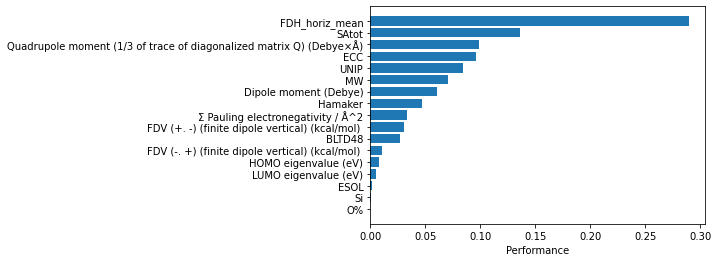

In [12]:
imp = model.feature_importances_[:20]
name = list(X_train.columns)[:20]

df = pd.DataFrame(imp, index=name, columns=["Importance"])
df.sort_values(by="Importance", inplace=True, ascending=False)

df.sort_values(by="Importance", inplace=True, ascending=False)

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 12})

# Example data
people = df.index
y_pos = np.arange(len(df))
performance = df["Importance"]

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
# plt.tight_layout()
plt.show()